<a href="https://colab.research.google.com/github/kovacova/random-magic/blob/master/projects/04-crosstab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crosstab Practice 

The crosstab function can operate on numpy arrays, series or columns in a dataframe. To a chieve similar results, we could use groupby or pivot_table.

First, we could use a groupby followed by an unstack to get the same results:

`df.groupby(['make', 'body_style'])['body_style'].count().unstack().fillna(0)
`

It is also possible to do something similar using a pivot_table :

`df.pivot_table(index='make', columns='body_style', aggfunc={'body_style':len}, fill_value=0)
`

[Tutorial](http://pbpython.com/pandas-crosstab.html)

In [0]:
import pandas as pd
import seaborn as sns

In [0]:
# Define the headers since the data does not have any
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

# Read in the CSV file and convert "?" to NaN
df_raw = pd.read_csv("http://mlr.cs.umass.edu/ml/machine-learning-databases/autos/imports-85.data",
                     header=None, names=headers, na_values="?" )

# Define a list of models that we want to review
models = ["toyota","nissan","mazda", "honda", "mitsubishi", "subaru", "volkswagen", "volvo"]

# Create a copy of the data with only the top 8 manufacturers
df = df_raw[df_raw.make.isin(models)].copy()

In [37]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
30,2,137.0,honda,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.6,58.0,4800.0,49,54,6479.0
31,2,137.0,honda,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.2,76.0,6000.0,31,38,6855.0
32,1,101.0,honda,gas,std,two,hatchback,fwd,front,93.7,...,79,1bbl,2.91,3.07,10.1,60.0,5500.0,38,42,5399.0
33,1,101.0,honda,gas,std,two,hatchback,fwd,front,93.7,...,92,1bbl,2.91,3.41,9.2,76.0,6000.0,30,34,6529.0
34,1,101.0,honda,gas,std,two,hatchback,fwd,front,93.7,...,92,1bbl,2.91,3.41,9.2,76.0,6000.0,30,34,7129.0


In [17]:
pd.crosstab(df.make, df.body_style)

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0,0,7,5,1
mazda,0,0,10,7,0
mitsubishi,0,0,9,4,0
nissan,0,1,5,9,3
subaru,0,0,3,5,4
toyota,1,3,14,10,4
volkswagen,1,0,1,9,1
volvo,0,0,0,8,3


In [18]:
pd.crosstab(df.make, df.fuel_type)

fuel_type,diesel,gas
make,,
honda,0,13
mazda,2,15
mitsubishi,0,13
nissan,1,17
subaru,0,12
toyota,3,29
volkswagen,4,8
volvo,1,10


## Diving Deeper into the Crosstab

One common need in a crosstab is to include subtotals. We can add them using the margins keyword:



In [19]:
pd.crosstab(df.make, df.num_doors, margins=True, margins_name="Total")

num_doors,four,two,Total
make,,,
honda,5,8,13
mazda,7,9,16
mitsubishi,4,9,13
nissan,9,9,18
subaru,9,3,12
toyota,18,14,32
volkswagen,8,4,12
volvo,11,0,11
Total,71,56,127


## Aggfunc 

By using aggfunc='mean' and values=df.curb_weight we are telling pandas to apply the mean function to the curb weight of all the combinations of the data. Under the hood, pandas is grouping all the values together by make and body_style, then calculating the average. In those areas where there is no car with those values, it displays NaN

<br> 

**📌.round(0)** - is particularly awesome, gets rid of all the extra decimal places.

In [20]:
pd.crosstab(df.make, df.body_style, values=df.curb_weight, aggfunc='mean').round(0)

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,NaN,NaN,1970.0,2289.0,2024.0
mazda,NaN,NaN,2254.0,2361.0,NaN
mitsubishi,NaN,NaN,2377.0,2394.0,NaN
nissan,NaN,2008.0,2740.0,2238.0,2452.0
subaru,NaN,NaN,2137.0,2314.0,2454.0
toyota,2975.0,2585.0,2370.0,2338.0,2708.0
volkswagen,2254.0,NaN,2221.0,2342.0,2563.0
volvo,NaN,NaN,NaN,3023.0,3078.0


## Normalize

In [21]:
# This table shows us that 2.3% of the total population are Toyota hardtops and 6.25% are Volvo sedans.

pd.crosstab(df.make, df.body_style, normalize=True)

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0.000000,0.000000,0.054688,0.039062,0.007812
mazda,0.000000,0.000000,0.078125,0.054688,0.000000
mitsubishi,0.000000,0.000000,0.070312,0.031250,0.000000
nissan,0.000000,0.007812,0.039062,0.070312,0.023438
subaru,0.000000,0.000000,0.023438,0.039062,0.031250
toyota,0.007812,0.023438,0.109375,0.078125,0.031250
volkswagen,0.007812,0.000000,0.007812,0.070312,0.007812
volvo,0.000000,0.000000,0.000000,0.062500,0.023438


The normalize parameter is even smarter because it allows us to perform this summary on just the columns or rows. For example, if we want to see how the body styles are distributed across makes:


In [22]:
# Looking at just the convertible column, you can see that 50% of the convertibles are made by Toyota and the other 50% by Volkswagen.

pd.crosstab(df.make, df.body_style, normalize='columns')

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0.0,0.00,0.142857,0.087719,0.0625
mazda,0.0,0.00,0.204082,0.122807,0.0000
mitsubishi,0.0,0.00,0.183673,0.070175,0.0000
nissan,0.0,0.25,0.102041,0.157895,0.1875
subaru,0.0,0.00,0.061224,0.087719,0.2500
toyota,0.5,0.75,0.285714,0.175439,0.2500
volkswagen,0.5,0.00,0.020408,0.157895,0.0625
volvo,0.0,0.00,0.000000,0.140351,0.1875


In [41]:
# We can do the same thing row-wise:

#This view of the data shows that of the Mitsubishi cars in this dataset, 69.23% are hatchbacks and the remainder (30.77%) are sedans.

pd.crosstab(df.make, df.body_style, normalize='index').round(2) # Added extra rounding

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0.00,0.00,0.54,0.38,0.08
mazda,0.00,0.00,0.59,0.41,0.00
mitsubishi,0.00,0.00,0.69,0.31,0.00
nissan,0.00,0.06,0.28,0.50,0.17
subaru,0.00,0.00,0.25,0.42,0.33
toyota,0.03,0.09,0.44,0.31,0.12
volkswagen,0.08,0.00,0.08,0.75,0.08
volvo,0.00,0.00,0.00,0.73,0.27


In [38]:
# A proof that the first row normalized works well 

0.538462+0.384615+0.076923

0.9999999999999999

## Grouping

One of the most useful features of the crosstab is that you can pass in multiple dataframe columns and pandas does all the grouping for you. For instance, if we want to see how the data is distributed by front wheel drive (fwd) and rear wheel drive (rwd), we can include the drive_wheels column by including it in the list of valid columns in the second argument to the crosstab .

I included the specific rownames and colnames that I want to include in the output. This is purely for display purposes but can be useful if the column names in the dataframe are not very specific.




In [26]:
pd.crosstab(df.make, [df.body_style, df.drive_wheels])

body_style   convertible     hardtop     hatchback         sedan          \
drive_wheels         fwd rwd     fwd rwd       4wd fwd rwd   4wd fwd rwd   
make                                                                       
honda                  0   0       0   0         0   7   0     0   5   0   
mazda                  0   0       0   0         0   6   4     0   5   2   
mitsubishi             0   0       0   0         0   9   0     0   4   0   
nissan                 0   0       1   0         0   2   3     0   9   0   
subaru                 0   0       0   0         1   2   0     2   3   0   
toyota                 0   1       0   3         0   8   6     0   7   3   
volkswagen             1   0       0   0         0   1   0     0   9   0   
volvo                  0   0       0   0         0   0   0     0   0   8   

body_style   wagon          
drive_wheels   4wd fwd rwd  
make                        
honda            0   1   0  
mazda            0   0   0  
mitsubishi       0   0   0  
nissan           0   3   0  
subaru           2   2   0  
toyota           2   1   1  
volkswagen       0   1   0  
volvo            0   0   3

In [29]:
# We can also do the same thing with index

pd.crosstab([df.make, df.num_doors], [df.body_style, df.drive_wheels], 
           rownames=['Auto Manufacturer', 'Doors'],
           colnames=['Body Style', 'Drive Type'],
           dropna=False)

Body Style              convertible         hardtop         hatchback          \
Drive Type                      4wd fwd rwd     4wd fwd rwd       4wd fwd rwd   
Auto Manufacturer Doors                                                         
honda             four            0   0   0       0   0   0         0   0   0   
                  two             0   0   0       0   0   0         0   7   0   
mazda             four            0   0   0       0   0   0         0   1   0   
                  two             0   0   0       0   0   0         0   5   4   
mitsubishi        four            0   0   0       0   0   0         0   0   0   
                  two             0   0   0       0   0   0         0   9   0   
nissan            four            0   0   0       0   0   0         0   1   0   
                  two             0   0   0       0   1   0         0   1   3   
subaru            four            0   0   0       0   0   0         0   0   0   
                  two             0   0   0       0   0   0         1   2   0   
toyota            four            0   0   0       0   0   0         0   6   0   
                  two             0   0   1       0   0   3         0   2   6   
volkswagen        four            0   0   0       0   0   0         0   0   0   
                  two             0   1   0       0   0   0         0   1   0   
volvo             four            0   0   0       0   0   0         0   0   0   
                  two             0   0   0       0   0   0         0   0   0   

Body Style              sedan         wagon          
Drive Type                4wd fwd rwd   4wd fwd rwd  
Auto Manufacturer Doors                              
honda             four      0   4   0     0   1   0  
                  two       0   1   0     0   0   0  
mazda             four      0   4   2     0   0   0  
                  two       0   0   0     0   0   0  
mitsubishi        four      0   4   0     0   0   0  
                  two       0   0   0     0   0   0  
nissan            four      0   5   0     0   3   0  
                  two       0   4   0     0   0   0  
subaru            four      2   3   0     2   2   0  
                  two       0   0   0     0   0   0  
toyota            four      0   7   1     2   1   1  
                  two       0   0   2     0   0   0  
volkswagen        four      0   7   0     0   1   0  
                  two       0   2   0     0   0   0  
volvo             four      0   0   8     0   0   3  
                  two       0   0   0     0   0   0

## Visualizing the Data with Seaborn Heatmaps

The output of the crosstab can be passed to a seaborn heatmap in order to visually summarize the data.

One of the really useful aspects of this approach is that seaborn collapses the grouped column and row names so that they can be more easily read.

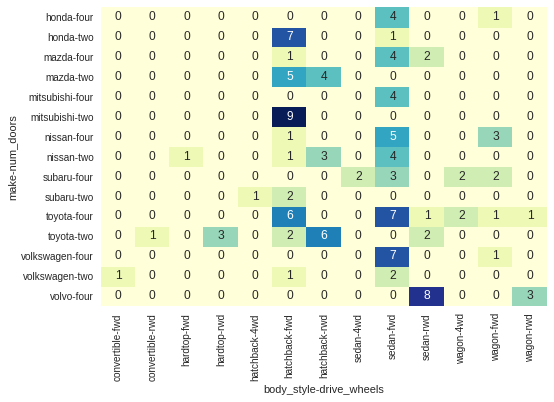

In [36]:
sns.heatmap(pd.crosstab([df.make, df.num_doors], [df.body_style, df.drive_wheels]),
            cmap='YlGnBu', annot=True, cbar=False);